Some Misc Bosons calculations

let's start by just considering two bosons in a single well and calculating the impact if the interaction between them.

let the single-particle solutions be $$\psi\{x_i\} = \Big(\frac{4}{\pi w_0^2}\Big)^{1/4} \exp\Big\{-\frac{2x_i^2}{w_0^2}\Big\}$$

for the appropriate waist w_0. Then let's do first order perturbation theory here. Our normal hamiltonian for two particles is

$$
H_0\{x_1,x_2\} = \frac{p_1^2+p_2^2}{2m}+\frac{1}{2} m \omega_0^2 (x_1^2+x_2^2)
$$

The ground-state of the non-interacting hamiltonian is

$$
\Psi\{x_1,x_2\} = \frac{2}{\pi w_0^2} \exp\Big\{-\frac{2(x_1^2+x_2^2)}{w_0^2}\Big\}
$$

Now let the perturbation be
$$
H_1 = a \delta\{x_1-x_2\}
$$

## Identical states

### Energy change

Then the energy change of the ground-state is

$$
E^1 = a \frac{4}{\pi w_0^2} \iint[dx_1,dx_2]\exp\Big\{-\frac{4(x_1^2+x_2^2)}{w_0^2}\Big\}\delta\{x_1-x_2\}\\
= a \frac{4}{\pi w_0^2} \int[dx]\exp\Big\{-\frac{8x^2}{w_0^2}\Big\}\\
= a \frac{4}{\pi w_0^2} \frac{\sqrt{2\pi}w_0}{4}\\
= \frac{a\sqrt{2}}{\pi w_0}
$$

In [1]:
from IPython.display import display
import sympy as sp
import numpy as np
sp.init_printing(use_latex=True)
from sympy.functions.special.delta_functions import DiracDelta
import MarksConstants as mc
from sympy import diff as D

In [2]:
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('dark_background')

In [3]:
from scipy.interpolate import interp1d

In [4]:
import Miscellaneous as misc

### Wavefunction change

... todo

## Triplet and singlet states

now I need to consider two locations for the gaussian spaed by $\Delta x$. The symetric wavefunction is the important one since for these considerations the bosons have the same spin so the siglet state is forbidden. 

$$
\Psi_{\text{Sym}}\{x_1, x_2\} = \psi\{x_1-\Delta/2\}\psi\{x_2+\Delta/2\}+\psi\{x_1+\Delta/2\}\psi\{x_2-\Delta/2\}
$$

### wavefunctions for ref

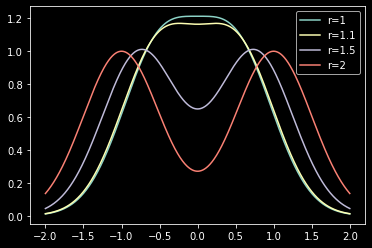

In [16]:
xp = np.linspace(-2,2,1000)
ypts1   = np.exp(-2*(xp-0.5)**2) + np.exp(-2*(xp+0.5)**2)
ypts1_2 = np.exp(-2*(xp-0.52)**2) + np.exp(-2*(xp+0.52)**2)
ypts2   = np.exp(-2*(xp-0.75)**2) + np.exp(-2*(xp+0.75)**2)
ypts3   = np.exp(-2*(xp-1)**2) + np.exp(-2*(xp+1)**2)
fig, ax = plt.subplots()
ax.plot(xp, ypts1, label='r=1')
ax.plot(xp, ypts1_2, label='r=1.1')
ax.plot(xp, ypts2, label='r=1.5')
ax.plot(xp, ypts3, label='r=2')
ax.legend()

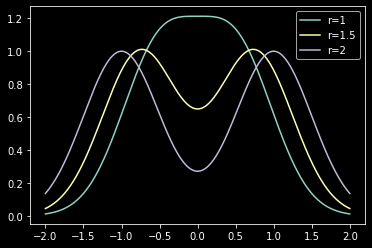

In [17]:
xp = np.linspace(-2,2,1000)
ypts1 = np.exp(-2*(xp-0.5)**2) + np.exp(-2*(xp+0.5)**2)
ypts2 = np.exp(-2*(xp-0.75)**2) + np.exp(-2*(xp+0.75)**2)
ypts3 = np.exp(-2*(xp-1)**2) + np.exp(-2*(xp+1)**2)
fig, ax = plt.subplots()
ax.plot(xp, ypts1, label='r=1')
ax.plot(xp, ypts2, label='r=1.5')
ax.plot(xp, ypts3, label='r=2')
ax.legend()

### wavefunction modifications

first thought seems more non-trivial... todo...?

# With 3D Variational Calculations

## Setup

In [5]:
def psi(x, w0):
    return sp.exp(-2*x**2/w0**2)

In [6]:
x1, x2, y1, y2, z1, z2, w0x, w0y, w0z, Delta = sp.symbols('x1 x2 y1 y2 z1 z2 w_x w_y w_z Delta', real=True, positive=True)

Double-Filled


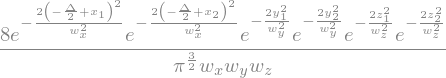

Mott-Insulator


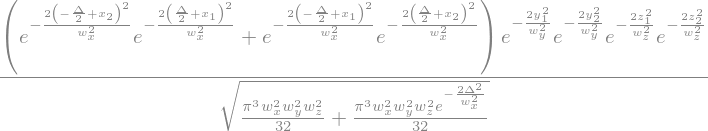

Superfluid


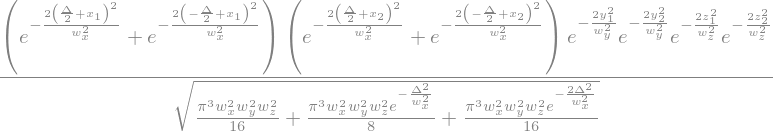

Anti-Superfluid


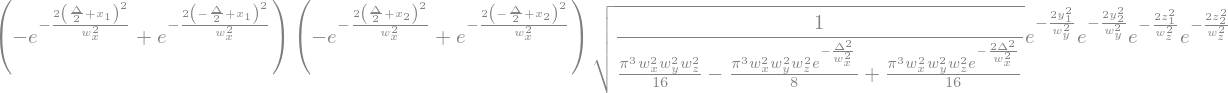

Anti-Mott-Insulator


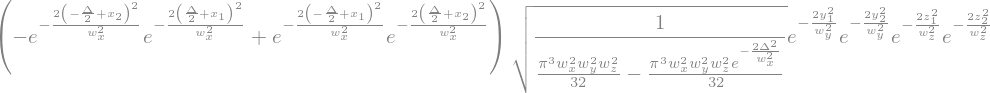

In [7]:
psiyz = psi(y1, w0y) * psi(y2, w0y) * psi(z1, w0z) * psi(z2, w0z)
xspace = ((x1,-sp.oo,sp.oo), (x2,-sp.oo,sp.oo),)
allspace = ((x1,-sp.oo,sp.oo), (x2,-sp.oo,sp.oo),(y1,-sp.oo,sp.oo), (y2,-sp.oo,sp.oo),(z1,-sp.oo,sp.oo), (z2,-sp.oo,sp.oo),)

wavefunctionsx = []
wavefunctions = []
names = ['Double-Filled', 'Mott-Insulator', 'Superfluid', 'Anti-Superfluid', 'Anti-Mott-Insulator']
norms = []
normsx = []

wavefunctionsx.append((psi(x1-Delta/2, w0x) * psi(x2-Delta/2, w0x)))
wavefunctionsx.append((psi(x1-Delta/2, w0x)*psi(x2+Delta/2, w0x)+psi(x1+Delta/2, w0x)*psi(x2-Delta/2, w0x)))
wavefunctionsx.append(((psi(x1-Delta/2, w0x)+psi(x1+Delta/2, w0x))*(psi(x2-Delta/2, w0x)+psi(x2+Delta/2, w0x))))
wavefunctionsx.append(((psi(x1-Delta/2, w0x)-psi(x1+Delta/2, w0x))*(psi(x2-Delta/2, w0x)-psi(x2+Delta/2, w0x))))
wavefunctionsx.append((psi(x1-Delta/2, w0x)*psi(x2+Delta/2, w0x)-psi(x1+Delta/2, w0x)*psi(x2-Delta/2, w0x)))

for wavefunctionx, name in zip(wavefunctionsx, names):
    print(name)
    normsx.append(sp.sqrt(1/(sp.integrate(wavefunctionx**2, *xspace))))
    wavefunctions.append(wavefunctionx*psiyz)
    norms.append(sp.sqrt(1/(sp.integrate(wavefunctions[-1]**2, *allspace))))
    assert(norms[-1]**2*sp.integrate(wavefunctions[-1]**2,*allspace))
    assert(normsx[-1]**2*sp.integrate(wavefunctionx**2,*xspace))
    display(norms[-1]*wavefunctions[-1])

### interaction energy

In [8]:
def interactionInt(base):
    xint = sp.integrate( base * DiracDelta(x2-x1), (x1, -sp.oo, sp.oo), (x2, -sp.oo, sp.oo))
    xyint = sp.integrate( xint * DiracDelta(y2-y1), (y2,-sp.oo,sp.oo), (y1,-sp.oo,sp.oo) )
    xyzint = sp.integrate( xyint * DiracDelta(z2-z1), (z2,-sp.oo,sp.oo), (z1,-sp.oo,sp.oo) )
    return xyzint

From adam's thesis:
$$
a=\frac{4\pi\hbar^2 a_s}{m}
$$

And from sources the scattering consetant is 95.44*a0

from the spin exchange paper there was U/h ~ 200

In [9]:
scatteringConstant = 4*np.pi*mc.hbar**2*95.44*mc.a0/mc.Rb87_M
V=10e-6*mc.k_B
spotSize = 650e-9
a_sc = sp.symbols('a_s_c',real=True,positive=True)
sympifyArgs = [a_sc, w0x, w0y, w0z, Delta]
DDelta3D = DiracDelta(x1-x2)*DiracDelta(y1-y2)*DiracDelta(z1-z2)

Double-Filled


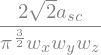

Mott-Insulator


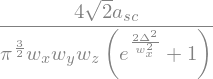

Superfluid


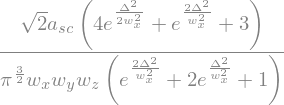

Anti-Superfluid


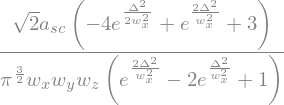

Anti-Mott-Insulator


In [10]:
interactionEnergies = []
for wave, norm, name in zip(wavefunctions, norms, names):    
    print(name)
    ie = sp.simplify(a_sc*norm**2*interactionInt(wave**2))
    interactionEnergies.append(sp.lambdify(sympifyArgs, ie, 'numpy'))    
    display(ie)

### Potential Energy

From adam's thesis:
$$
a=\frac{4\pi\hbar^2 a_s}{m}
$$

And from sources the scattering consetant is 95.44*a0

from the spin exchange paper there was U/h ~ 200

In [11]:
Delta_tw, V_tw, w_twx, w_twy, w_twz = sp.symbols('Delta_t V w_t_x w_t_y w_t_z', real=True, positive=True)

In [12]:
def potential3D(Xp, Yp, Zp, x0, V, w_x, w_y, w_z):
    return potentialDipW0(Xp, V, x0, w_x)*potentialDipW0(Yp, 1, 0, w_y) * potentialDipW0(Zp, 1, 0, w_z)

In [13]:
def potentialDipW0(x, V, x0, w0):
    return V * sp.exp(-2*(x-x0)**2/w0**2)

In [16]:
def int3D(base, t1, t2, t3, t4):
    print('xint...')
    xint = (sp.integrate( base*t1, (x1, -sp.oo, sp.oo), (x2, -sp.oo, sp.oo)) + sp.integrate( base*t2, (x1, -sp.oo, sp.oo), (x2, -sp.oo, sp.oo))
         + sp.integrate( base*t3, (x1, -sp.oo, sp.oo), (x2, -sp.oo, sp.oo)) + sp.integrate( base*t4, (x1, -sp.oo, sp.oo), (x2, -sp.oo, sp.oo)))
    print('yint...')
    xyint = (sp.integrate( xint*t1, (y2,-sp.oo,sp.oo), (y1,-sp.oo,sp.oo) )+sp.integrate( xint*t2, (y2,-sp.oo,sp.oo), (y1,-sp.oo,sp.oo) )
             +sp.integrate( xint*t3, (y2,-sp.oo,sp.oo), (y1,-sp.oo,sp.oo) )+sp.integrate( xint*t1, (y4,-sp.oo,sp.oo), (y1,-sp.oo,sp.oo) ))
    print('zint...')
    xyzint = sp.integrate( xyzint*t1, (z2,-sp.oo,sp.oo), (z1,-sp.oo,sp.oo) )
    return xyzint

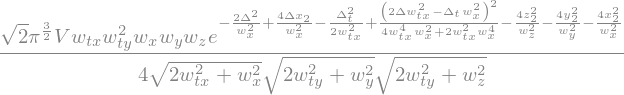

In [17]:
sp.simplify(sp.integrate(wavefunctions[0]**2 * potentialDipW0(x1, V_tw, -Delta_tw/2, w_twx) * potentialDipW0(y1, 1, 0, w_twy) * potentialDipW0(z1, 1, 0, w_twy), 
             (y1, -sp.oo,sp.oo), (z1, -sp.oo, sp.oo), (x1,-sp.oo,sp.oo)))

In [18]:
def potentialInt(base, potentialTerms):
    total = sp.S(0)
    for potentialTerm in potentialTerms:
        print('.',end='')
        int1   = sp.simplify(sp.integrate(base * potentialTerm, (y1, -sp.oo,sp.oo), (z1, -sp.oo, sp.oo), (x1,-sp.oo,sp.oo)))
        total += sp.simplify(sp.integrate(int1, (y2, -sp.oo,sp.oo), (z2, -sp.oo, sp.oo), (x2,-sp.oo,sp.oo)))
    return total

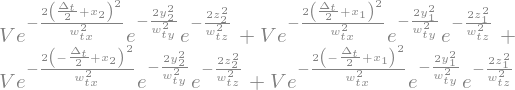

In [19]:
potential = ( potential3D(x1, y1, z1, -Delta_tw/2, V_tw, w_twx, w_twy, w_twz) + potential3D(x1, y1, z1, Delta_tw/2, V_tw, w_twx, w_twy, w_twz)
            + potential3D(x2, y2, z2, -Delta_tw/2, V_tw, w_twx, w_twy, w_twz) + potential3D(x2, y2, z2, Delta_tw/2, V_tw, w_twx, w_twy, w_twz))
potential

In [20]:
peSympifyArgs = [V_tw, w0x, w0y, w0z, w_twx, w_twy, w_twz, Delta, Delta_tw]

In [21]:
peSympifyArgs

In [22]:
names

['Double-Filled',
 'Mott-Insulator',
 'Superfluid',
 'Anti-Superfluid',
 'Anti-Mott-Insulator']

In [23]:
nMI = norms[1]
wfMI = wavefunctions[1]
nSF = norms[2]
wfSF = wavefunctions[2]

Double-Filled
....

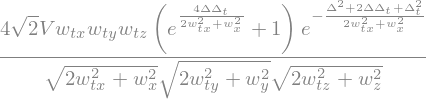

Mott-Insulator
....

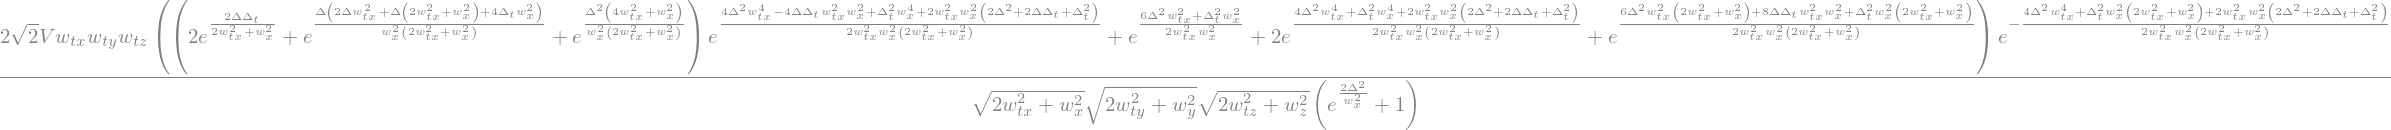

Superfluid
....

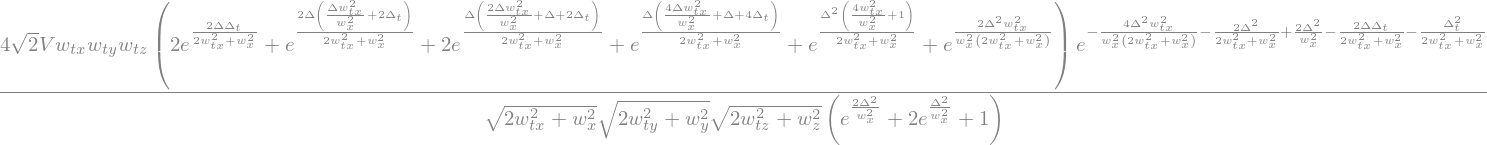

Anti-Superfluid
....

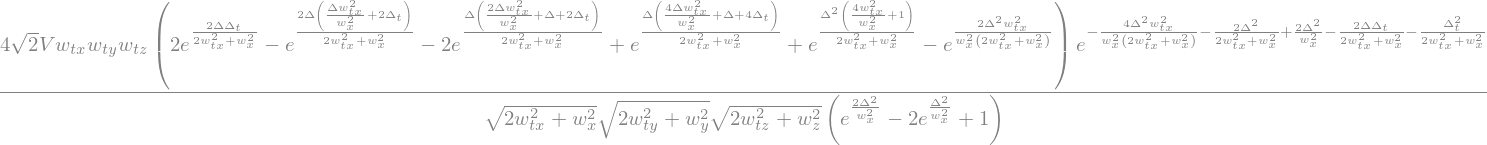

Anti-Mott-Insulator
....

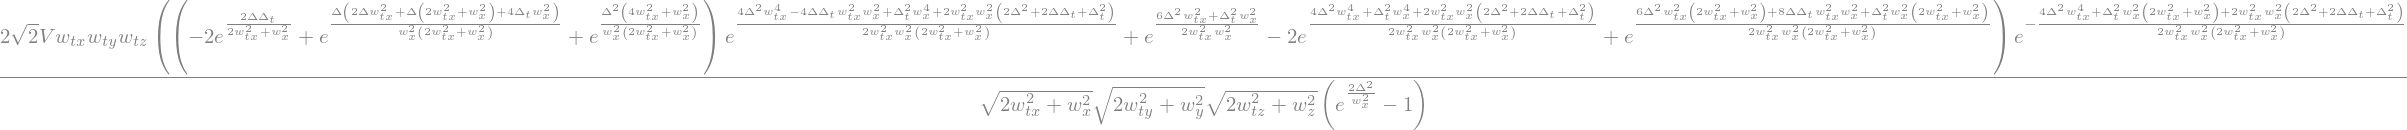

In [26]:
potentialEnergies = []
for wave, norm, name in zip(wavefunctions, norms, names):    
    print(name)
    potentialTerms = ( potential3D(x1, y1, z1, -Delta_tw/2, V_tw, w_twx, w_twy, w_twz), potential3D(x1, y1, z1, Delta_tw/2, V_tw, w_twx, w_twy, w_twz),
                       potential3D(x2, y2, z2, -Delta_tw/2, V_tw, w_twx, w_twy, w_twz), potential3D(x2, y2, z2, Delta_tw/2, V_tw, w_twx, w_twy, w_twz))
    pe = sp.simplify(norm**2*potentialInt(wave**2, potentialTerms))
    potentialEnergies.append(sp.lambdify(peSympifyArgs, pe, 'numpy'))    
    display(pe)

In [27]:
offDiagTerm = sp.simplify(nMI*nSF*potentialInt(wfMI*wfSF, potentialTerms))

....

In [28]:
offDiagFunc = sp.lambdify(peSympifyArgs, offDiagTerm, 'numpy')

### Kinetic Energy

In [29]:
def KE(func,v1, v2):
    return -hbar**2/(2*m)*(D(D(func,v1),v1) + D(D(func,v2),v2))

In [32]:
hbar, m = sp.symbols('hbar m')
keSympifyArgs = [w0x, w0y, w0z, Delta]
N_d = norms[0]
Psi_d = wavefunctions[0]
yKE = N_d**2*sp.integrate(Psi_d*KE(wavefunctions[0],y1,y2),*allspace)
zKE = N_d**2*sp.integrate(Psi_d*KE(wavefunctions[0],z1,z2),*allspace)

Double-Filled


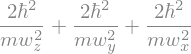

Mott-Insulator


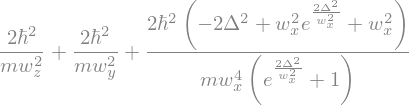

Superfluid


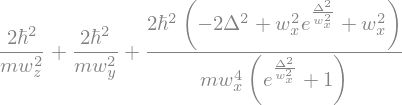

Anti-Superfluid


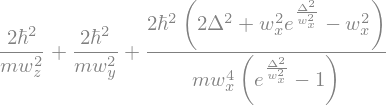

Anti-Mott-Insulator


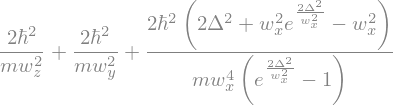

In [33]:
kineticEnergies = []
for wavex, normx, name in zip(wavefunctionsx, normsx, names):    
    print(name)
    ke = sp.simplify(normx**2*sp.integrate(wavex*KE(wavex,x1,x2),*xspace)) + yKE + zKE
    kineticEnergies.append(sp.lambdify(keSympifyArgs, ke.subs(hbar,mc.hbar).subs(m,mc.Rb87_M), 'numpy'))    
    display(ke)

### Total summary

Variational Calibration Loading

In [34]:
DeltaLoad3d = np.load('Deltas.npy')
VDeltaLoad3d = np.load('VDeltas.npy')
xFreqLoad = np.load('xFreqs.npy')
yFreqLoad = np.load('yFreqs.npy')
zFreqLoad = np.load('zFreqs.npy')

DeltaLoad3dZoom = np.load('Deltas_z.npy')
VDeltaLoad3dZoom = np.load('VDeltas_z.npy')
xFreqLoadZoom = np.load('xFreqs_z.npy')
yFreqLoadZoom = np.load('yFreqs_z.npy')
zFreqLoadZoom = np.load('zFreqs_z.npy')

allTweezerDelta = np.append(DeltaLoad3d,DeltaLoad3dZoom)
allPsiDelta = np.append(VDeltaLoad3d,VDeltaLoad3dZoom)
allXFreq = np.append(xFreqLoad, xFreqLoadZoom)
allYFreq = np.append(yFreqLoad, yFreqLoadZoom)
allZFreq = np.append(zFreqLoad, zFreqLoadZoom)

interpSpacing = interp1d(allTweezerDelta, allPsiDelta)
xFreqInterp = interp1d(allTweezerDelta, allXFreq)
yFreqInterp = interp1d(allTweezerDelta, allYFreq)
zFreqInterp = interp1d(allTweezerDelta, allZFreq)

In [ ]:
potentialEnergies[0](0, wfWx[0], wfWy[0], wfWz[0], wfDeltas[0])

In [ ]:
np.mean(potentialEnergyVals, axis=0).shape

In [37]:
names

['Double-Filled',
 'Mott-Insulator',
 'Superfluid',
 'Anti-Superfluid',
 'Anti-Mott-Insulator']

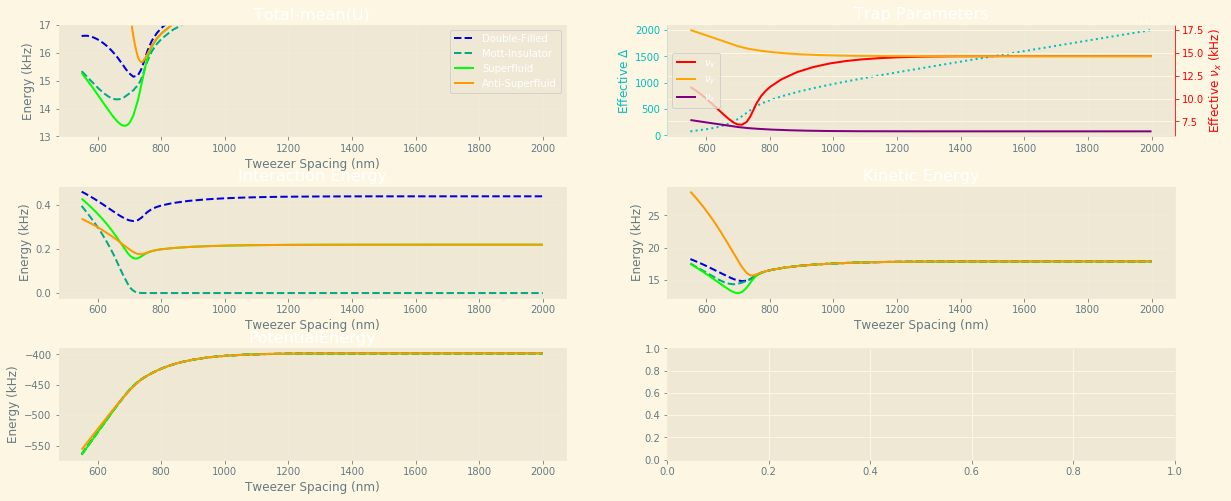

In [55]:
trapDeltas = np.linspace(0.55e-6,2e-6,1000)
#trapDeltas = np.linspace(0.72e-6,0.78e-6,1000)
#trapDeltas = np.linspace(0.65e-6,0.85e-6,1000)
wfDeltas = interpSpacing(trapDeltas)
wfXFreqs = xFreqInterp(trapDeltas)
wfYFreqs = yFreqInterp(trapDeltas)
wfZFreqs = zFreqInterp(trapDeltas)

wfWx = 2*np.sqrt(mc.hbar/(mc.Rb87_M*(2*np.pi*wfXFreqs)))
wfWy = 2*np.sqrt(mc.hbar/(mc.Rb87_M*(2*np.pi*wfYFreqs)))
wfWz = 2*np.sqrt(mc.hbar/(mc.Rb87_M*(2*np.pi*wfZFreqs)))
dbl_vals, mi_vals, sup_vals, asup_vals, aMi_vals = [[] for _ in range(5)]
dblIv, dblKev, miIv, miKev, supIv, supKev, asupIv, asupKev, aMiIv, aMiKev = [[] for _ in range(10)]
interactionEnergyVals = [[] for _ in interactionEnergies]
kineticEnergyVals = [[] for _ in kineticEnergies]
potentialEnergyVals = [[] for _ in potentialEnergies]
totalE = [[] for _ in potentialEnergies]
offDiagVals = []
for trDelta, delta, w0x, w0y, w0z in zip(trapDeltas, wfDeltas, wfWx, wfWy, wfWz):
    for num, (potEnergyF, potEnergyVals) in enumerate(zip(potentialEnergies, potentialEnergyVals)):
        potentialEnergyVals[num] = np.append(potEnergyVals, potEnergyF(-V, w0x, w0y, w0z, 650e-9, 650e-9, 1.5e-6, delta, trDelta ))
    for num, (intEnergyF, intEnergyVals) in enumerate(zip(interactionEnergies, interactionEnergyVals)):
        interactionEnergyVals[num] = np.append(intEnergyVals, intEnergyF(scatteringConstant, w0x, w0y, w0z, delta))
    for num, (kinEnergyF, kinEnergyVals) in enumerate(zip(kineticEnergies, kineticEnergyVals)):
        kineticEnergyVals[num] = np.append(kinEnergyVals, kinEnergyF(w0x, w0y, w0z, delta))
    offDiagVals = np.append(offDiagVals, offDiagFunc(-V, w0x, w0y, w0z, 650e-9, 650e-9, 1.5e-6, delta, trDelta ))
    for num in range(len(names)):
        totalE[num] = np.append(totalE[num], potentialEnergyVals[num] + interactionEnergyVals[num] + kineticEnergyVals[num])
    
diagV1 = []
diagV2 = []
for valNum in range(len(offDiagVals)):
    mat = np.array([[totalE[1][valNum], offDiagVals[valNum]], [offDiagVals[valNum], totalE[2][valNum]]])
    res = np.linalg.eigvals(mat)
    diagV1 = np.append(diagV1, min(res))
    diagV2 = np.append(diagV2, max(res))

fig, axs = plt.subplots(3,2,figsize=(20,8))
colors, _ = misc.getColors(5)
titles = ['Total-mean(U)', 'Interaction Energy', 'Kinetic Energy', 'PotentialEnergy']
linestyles = ['--','--','-','-']
for ax, vals, title, in zip( [axs[0,0],axs[1,0],axs[1,1], axs[2,0]], 
                            [np.array(interactionEnergyVals) + np.array(kineticEnergyVals)+np.array(potentialEnergyVals)-np.mean(potentialEnergyVals, axis=0), 
                             interactionEnergyVals, kineticEnergyVals, potentialEnergyVals], 
                            titles ):
    for wfVals, name, color, ls in zip(vals[:-1], names, colors, linestyles):
        ax.plot(trapDeltas*1e9,wfVals/mc.h*1e-3, label=name, linestyle=ls, color=color)
    ax.set_xlabel('Tweezer Spacing (nm)')
    ax.set_ylabel('Energy (kHz)')
    ax.set_title(title)
    ax.grid(alpha=0.2)
#axs[0,0].plot(trapDeltas*1e9, diagV1/mc.h*1e-3,label='lower')
#axs[0,0].plot(trapDeltas*1e9, diagV2/mc.h*1e-3,label='upper')
axs[0,0].set_ylim(13,17)
axs[0,0].legend();
ax2 = axs[0,1]
ax2.set_title('Trap Parameters')
ax2.grid(alpha=0.2)
ax2.plot(trapDeltas*1e9, wfDeltas*1e9,':', color='c')
ax2.set_ylabel(r'Effective $\Delta$', color='c')
ax2.spines['left'].set_color('c')
ax2.tick_params(axis='y', colors='c')

ax3 = ax2.twinx()
ax3.plot(trapDeltas*1e9, wfXFreqs*1e-3, color='r', label=r'$\nu_x$')
ax3.plot(trapDeltas*1e9, wfYFreqs*1e-3, color='orange', label=r'$\nu_y$')
ax3.plot(trapDeltas*1e9, wfZFreqs*1e-3, color='purple', label=r'$\nu_z$')
ax3.legend()
ax3.set_ylabel(r'Effective $\nu_x$ (kHz)', color='r')
ax3.spines['right'].set_color('red')
ax3.tick_params(axis='y', colors='red')

fig.subplots_adjust(hspace=0.45)
ax = axs[1,0]

In [74]:
matplotlib.style.use('default')

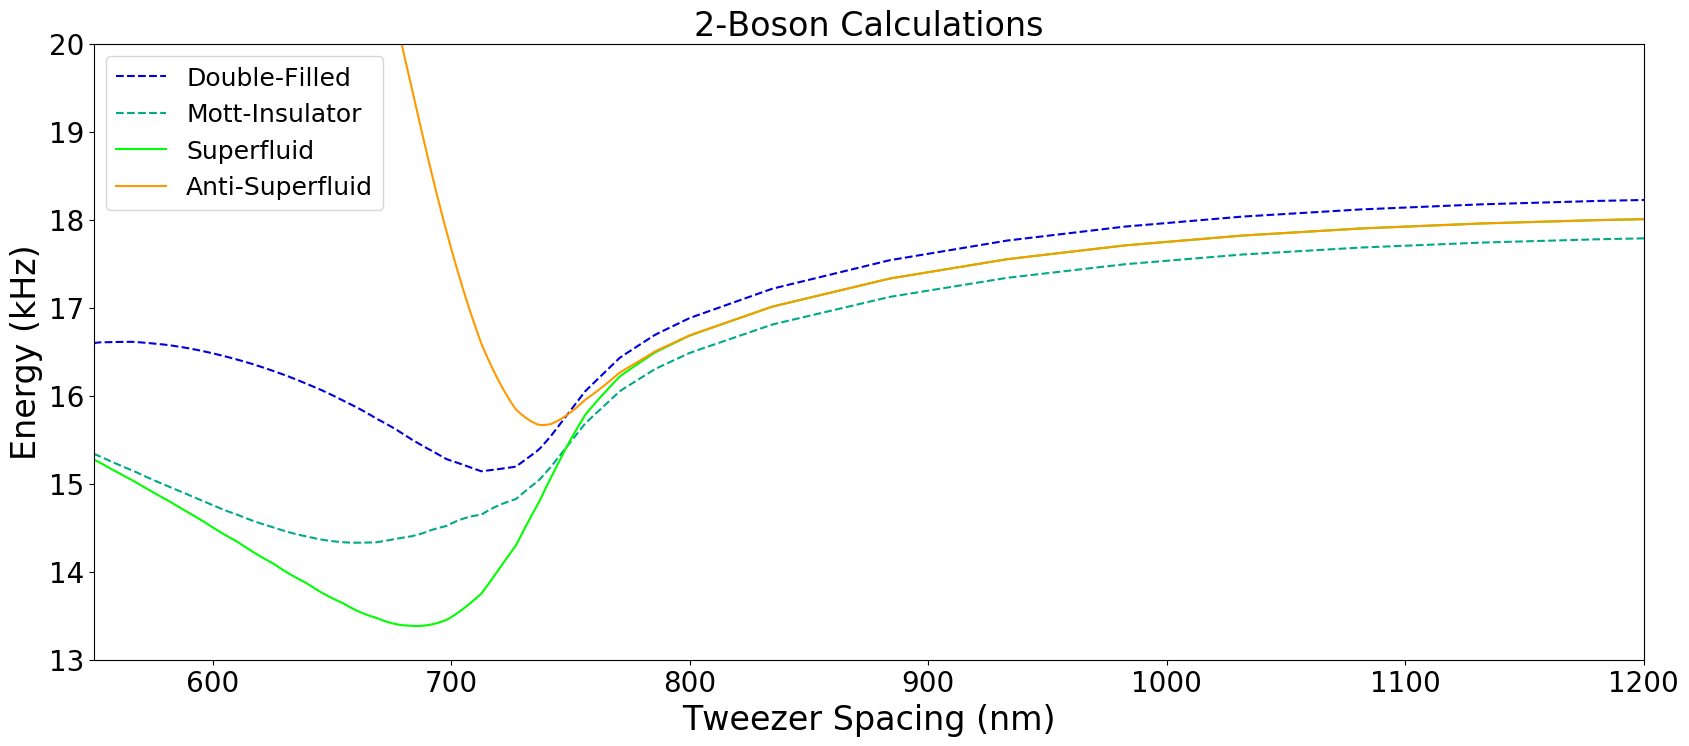

In [78]:
fig, ax = plt.subplots(figsize=(20,8))
colors, _ = misc.getColors(5)
titles = ['Total-mean(U)', 'Interaction Energy', 'Kinetic Energy', 'PotentialEnergy']
linestyles = ['--','--','-','-']
vals = np.array(interactionEnergyVals) + np.array(kineticEnergyVals)+np.array(potentialEnergyVals)-np.mean(potentialEnergyVals, axis=0)
for wfVals, name, color, ls in zip(vals[:-1], names, colors, linestyles):
    ax.plot(trapDeltas*1e9,wfVals/mc.h*1e-3, label=name, linestyle=ls, color=color)
ax.set_xlabel('Tweezer Spacing (nm)', fontsize=24)
ax.set_ylabel('Energy (kHz)', fontsize=24)

ax.set_title('2-Boson Calculations', fontsize=24)
#ax.grid(alpha=1)
ax.set_ylim(13,20)
ax.set_xlim(550,1200)
ax.tick_params(axis='both', which='major', labelsize=20)
leg = ax.legend(fontsize=18);
for text in leg.get_texts():
    text.set_color("k")

fig.subplots_adjust(hspace=0.45)
ax = axs[1,0]

In [41]:
import numpy as np

In [ ]:
matplotlib.style.available

In [54]:
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('Solarize_Light2')

In [43]:
DeltaLoad3d = np.load('Deltas.npy')
VDeltaLoad3d = np.load('VDeltas.npy')
xFreqLoad = np.load('xFreqs.npy')
yFreqLoad = np.load('yFreqs.npy')
zFreqLoad = np.load('zFreqs.npy')

In [44]:
import Miscellaneous as misc

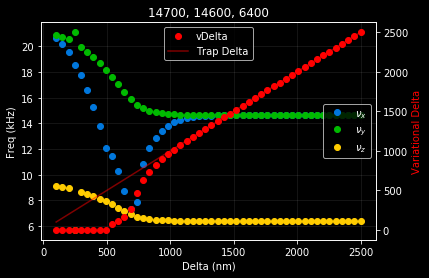

In [45]:
fig, ax = plt.subplots()
xf = xFreqLoad
yf = yFreqLoad
zf = zFreqLoad
vDeltas = VDeltaLoad3d
def ref(freqs):
    return freqs[-1]
colors, _ = misc.getColors(4)
pltDeltas = DeltaLoad3d
#ax.plot(pltDeltas*1e9, [(freq - ref(xf))/ref(xf) for freq in xf],'o', color=colors[0], label=r'$\nu_x$')
#ax.plot(pltDeltas*1e9, [(freq - ref(yf))/ref(yf) for freq in yf],'o', color=colors[1], label=r'$\nu_y$')
#ax.plot(pltDeltas*1e9, [(freq - ref(zf))/ref(zf) for freq in zf],'.', color=colors[2], label=r'$\nu_z$')
ax.plot(pltDeltas*1e9, xf*1e-3, 'o', color=colors[0], label=r'$\nu_x$')
ax.plot(pltDeltas*1e9, yf*1e-3, 'o', color=colors[1], label=r'$\nu_y$')
ax.plot(pltDeltas*1e9, zf*1e-3, 'o', color=colors[2], label=r'$\nu_z$')
ax2 = ax.twinx()
ax2.plot(pltDeltas*1e9, vDeltas*1e9,'o', color='r', label='vDelta')
ax2.plot(pltDeltas*1e9, pltDeltas*1e9,'-', color='r', alpha=0.5, label='Trap Delta')
ax.set_xlabel('Delta (nm)')
ax.set_ylabel('Freq (kHz)')
ax.grid(alpha=0.1)
ax2.set_ylabel('Variational Delta',color='r')
ax.set_title(misc.round_sig_str(ref(xf))+', ' + misc.round_sig_str(ref(yf)) + ', ' + misc.round_sig_str(ref(zf)))
ax.legend(loc='center right')
ax2.legend(loc='upper center')

In [51]:
deltas = np.linspace(0.65e-6,0.8e-6,1000)
wfDeltas = interpSpacing(deltas)
wfXFreqs = xFreqInterp(deltas)
wfYFreqs = yFreqInterp(deltas)
wfZFreqs = zFreqInterp(deltas)

wfWx = 2*np.sqrt(mc.hbar/(mc.Rb87_M*(2*np.pi*wfXFreqs)))
wfWy = 2*np.sqrt(mc.hbar/(mc.Rb87_M*(2*np.pi*wfYFreqs)))
wfWz = 2*np.sqrt(mc.hbar/(mc.Rb87_M*(2*np.pi*wfZFreqs)))
dbl_vals, mi_vals, sup_vals, asup_vals, aMi_vals = [[] for _ in range(5)]
dblIv, dblKev, miIv, miKev, supIv, supKev, asupIv, asupKev, aMiIv, aMiKev = [[] for _ in range(10)]
interactionEnergyVals = [[] for _ in interactionEnergies]
kineticEnergyVals = [[] for _ in kineticEnergies]
for delta, w0x, w0y, w0z in zip(wfDeltas, wfWx, wfWy, wfWz):
    for intEnergyF, intEnergyVals in zip(interactionEnergies, interactionEnergyVals):
        intEnergyVals = np.append(intEnergyVals, intEnergyF(scatteringConstant, w0x, w0y, w0z, delta))
    dblIv = np.append(dblIv, dblInteractionEnergy(scatteringConstant, w0x, w0y, w0z, delta))
    miIv = np.append(miIv, miInteractionEnergy(scatteringConstant, w0x, w0y, w0z, delta))
    supIv = np.append(supIv, supInteractionEnergy(scatteringConstant, w0x, w0y, w0z, delta))
    asupIv = np.append(asupIv, aSupInteractionEnergy(scatteringConstant, w0x, w0y, w0z, delta))
    aMiIv = np.append(aMiIv, aMiInteractionEnergy(scatteringConstant, w0x, w0y, w0z, delta))
    
    dblKev = np.append(dblKev, dblKe(w0x, w0y, w0z, delta))
    miKev = np.append(miKev, miKe(w0x, w0y, w0z, delta))
    supKev = np.append(supKev, supKe(w0x, w0y, w0z, delta))
    asupKev = np.append(asupKev, aSupKe(w0x, w0y, w0z, delta))
    aMiKev = np.append(aMiKev, aMiKe(w0x, w0y, w0z, delta))    
fig, axs = plt.subplots(2,2,figsize=(15,8))
colors, _ = misc.getColors(4)
interactionEnergies = np.array([dblIv, miIv, supIv, asupIv, aMiIv])
kineticEnergies = np.array([dblKev, miKev, supKev, asupKev, aMiKev])
titles = ['Total Energy', 'Interaction Energy', 'Kinetic Energy']
for ax, vals, title in zip([axs[0,0],axs[1,0],axs[1,1]], [interactionEnergies + kineticEnergies, interactionEnergies, kineticEnergies], titles):
    ax.plot(deltas*1e9,vals[1]/mc.h*1e-3, label='Mott-Insulator', linestyle='--', color=colors[0])
    ax.plot(deltas*1e9,vals[0]/mc.h*1e-3, label='Double-Filled', linestyle='--', color=colors[1])
    ax.plot(deltas*1e9,vals[2]/mc.h*1e-3, label='Superfluid',linestyle='-', color=colors[2])
    ax.plot(deltas*1e9,vals[3]/mc.h*1e-3, label='Anti-Superfluid', color=colors[3])
    #ax.plot(deltas*1e9,aMi_vals, label='Anti-MI (Fermionic)',color='r',linestyle='-.', zorder=-10)
    ax.set_xlabel('Tweezer Spacing (nm)')
    ax.set_ylabel('Energy (kHz)')
    ax.set_title(title)
    ax.grid(alpha=0.2)
axs[0,0].set_ylim(13,18)
axs[0,0].legend();
ax2 = axs[0,1]
ax2.set_title('Trap Parameters')
ax2.grid(alpha=0.2)
ax2.plot(deltas*1e9, wfDeltas*1e9,':', color='c')
ax2.set_ylabel(r'Effective $\Delta$', color='c')
ax2.spines['left'].set_color('c')
ax2.tick_params(axis='y', colors='c')

ax3 = ax2.twinx()
ax3.plot(deltas*1e9, wfXFreqs*1e-3, color='r', label=r'$\nu_x$')
ax3.plot(deltas*1e9, wfYFreqs*1e-3, color='orange', label=r'$\nu_y$')
ax3.plot(deltas*1e9, wfZFreqs*1e-3, color='purple', label=r'$\nu_z$')
ax3.legend()
ax3.set_ylabel(r'Effective $\nu_x$ (kHz)', color='r')
ax3.spines['right'].set_color('red')
ax3.tick_params(axis='y', colors='red')
fig.subplots_adjust(hspace=0.3)
ax = axs[1,0]

NameError: name 'dblInteractionEnergy' is not defined